# pandas Foundations

## Chapter 1: Data ingestion & inspection

### Review of pandas DataFrames

#### pandas DataFrames
* tabular data structure with rows & columns
* Example: DataFrame of Apple Stock data

#### Indexes and columns
* `type(df)`
* `df.shape`
* `df.index`

#### Slicing
* `df.iloc[:5,:]`
* `df.iloc[-5:,:]`

#### head() and tail()
* `df.head()`
* `df.tail()`

#### info()
* `df.info()`

#### Broadcasting
* Assigning scalar value to column slice broadbasts value to each row.
* `df.iloc[::3, -1] = np.nan`

#### Series
* `low = df['Low']`
* `type(low)`

### Building DataFrames from scratch

#### DataFrames from CSV files

In [1]:
import pandas as pd
users = pd.read_csv('datasets/users.csv', index_col=0)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


#### DataFrames from dict (1)

In [2]:
import pandas as pd
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitors': [139, 237, 326, 456],
        'signups': [7, 12, 3, 5]}
users = pd.DataFrame(data)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


#### DataFrames from dict (2)

In [3]:
import pandas as pd
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_labels = ['city', 'signups', 'visitors', 'weekday']
list_cols = [cities, signups, visitors, weekdays]
zipped = list(zip(list_labels, list_cols))
zipped

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']),
 ('signups', [7, 12, 3, 5]),
 ('visitors', [139, 237, 326, 456]),
 ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]

In [4]:
data = dict(zipped)
users = pd.DataFrame(data)
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


#### Broadcasting

In [5]:
users['fees'] = 0 # Broadcasts to entire column
users

,city,signups,visitors,weekday,fees
0,Austin,7,139,Sun,0
1,Dallas,12,237,Sun,0
2,Austin,3,326,Mon,0
3,Dallas,5,456,Mon,0


#### Broadcasting with a dict

In [6]:
import pandas as pd
heights = [59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1]
data = {'height': heights, 'sex': 'M'}
results = pd.DataFrame(data)
results

,height,sex
0,59.0,M
1,65.2,M
2,62.9,M
3,65.4,M
4,63.7,M
5,65.7,M
6,64.1,M


#### Index and columns

In [7]:
results.columns = ['height (in)', 'sex']
results.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
results

,height (in),sex
A,59.0,M
B,65.2,M
C,62.9,M
D,65.4,M
E,63.7,M
F,65.7,M
G,64.1,M


### Importing & exporting data

#### Datasets form CSV files

In [9]:
import pandas as pd
filepath = 'datasets/ISSN_D_tot.csv'
sunspots = pd.read_csv(filepath)
sunspots.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


#### Problems
* CSV file has no column headers
    * Columns 0-2: Gregorian date (year, month, day)
    * Column 3: Data as fraction as year
    * Column 4: Daily total sunspot number
    * Column 5: Definitive/provisional indicator (1 or 0)
* Missing values in column 4: indicated by -1
* Dates representation inconvenient

#### Using header keyword

In [10]:
sunspots = pd.read_csv(filepath, header = None)
sunspots.iloc[10:20, :]

,0,1,2,3,4,5
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


#### Using names keyword

In [11]:
col_names = ['year', 'month', 'day', 'dec_date', 'sunspots', 'definite']

sunspots = pd.read_csv(filepath, header = None, names = col_names)
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


#### Using na_values keyword

In [12]:
sunspots = pd.read_csv(filepath, header = None, 
                       names = col_names, na_values = {'sunspots':[' -1']})
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,NaN,1
11,1818,1,12,1818.034,NaN,1
12,1818,1,13,1818.037,22.0,1
13,1818,1,14,1818.040,NaN,1
14,1818,1,15,1818.042,NaN,1
15,1818,1,16,1818.045,NaN,1
16,1818,1,17,1818.048,46.0,1
17,1818,1,18,1818.051,59.0,1
18,1818,1,19,1818.053,63.0,1
19,1818,1,20,1818.056,NaN,1


#### Using parse_dates keyword

In [13]:
sunspots = pd.read_csv(filepath, header = None, 
                       names = col_names, na_values = {'sunspots':[' -1']},
                       parse_dates = [[0,1,2]])
sunspots.iloc[10:20, :]

,year_month_day,dec_date,sunspots,definite
10,1818-01-11,1818.031,NaN,1
11,1818-01-12,1818.034,NaN,1
12,1818-01-13,1818.037,22.0,1
13,1818-01-14,1818.040,NaN,1
14,1818-01-15,1818.042,NaN,1
15,1818-01-16,1818.045,NaN,1
16,1818-01-17,1818.048,46.0,1
17,1818-01-18,1818.051,59.0,1
18,1818-01-19,1818.053,63.0,1
19,1818-01-20,1818.056,NaN,1


#### Using dates as index

In [14]:
sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71861 entries, 1818-01-01 to 2014-09-30
Data columns (total 4 columns):
year_month_day    71861 non-null datetime64[ns]
dec_date          71861 non-null float64
sunspots          68614 non-null float64
definite          71861 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.7 MB


#### Trimming redundant columns

In [15]:
cols = ['sunspots', 'definite']
sunspots = sunspots[cols]
sunspots.iloc[10:20,:]

,sunspots,definite
date,,
1818-01-11,NaN,1
1818-01-12,NaN,1
1818-01-13,22.0,1
1818-01-14,NaN,1
1818-01-15,NaN,1
1818-01-16,NaN,1
1818-01-17,46.0,1
1818-01-18,59.0,1
1818-01-19,63.0,1


#### Writing files

In [ ]:
out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
susnspots.to_csv(out_tsv, sep = '\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)

### Plotting with pandas

#### AAPL stock data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
aapl = pd.read_csv('datasets/aapl.csv', index_col = 'Date', parse_dates = True)
aapl.head(6)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
2008-10-07,100.48,101.50,88.95,89.16,67099000,89.16


#### Plotting arrays (matplotlib)

In [17]:
close_arr = aapl['Close'].values
type(close_arr)

numpy.ndarray

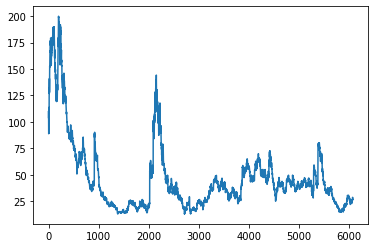

In [18]:
plt.plot(close_arr)
plt.show()

#### Plotting series (matplotlib)

In [19]:
close_series = aapl['Close']
type(close_series)

pandas.core.series.Series

/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


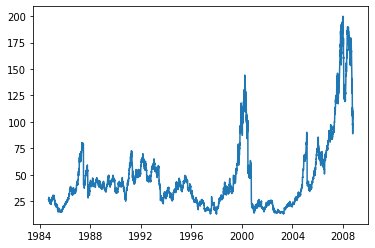

In [20]:
plt.plot(close_series)
plt.show()

#### Plotting Series (pandas)

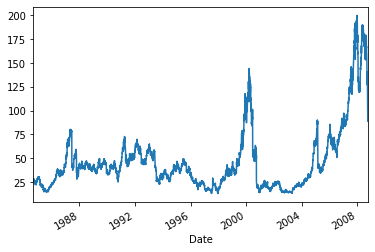

In [21]:
close_series.plot()
plt.show()

#### Plotting DataFrames (pandas)

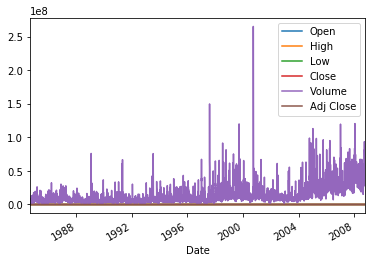

In [22]:
aapl.plot()  # plots all Series at once
plt.show()

#### Plotting DataFrames (matplotlib)

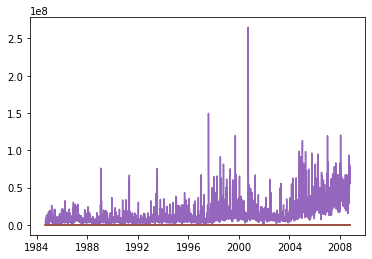

In [23]:
plt.plot(aapl)  #plots all columns at once
plt.show()

#### Fixing scales

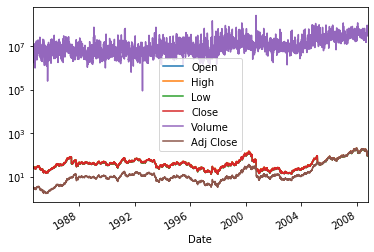

In [24]:
aapl.plot()
plt.yscale('log')  # logarithmic scaled on vertical axis
plt.show()

#### Customizing plots

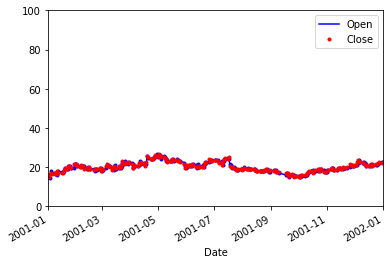

In [25]:
aapl['Open'].plot(color = 'b', style = '.-', legend = True)
aapl['Close'].plot(color = 'r', style = '.', legend = True)
plt.axis(('2001', '2002', 0, 100))
plt.show()

#### Saving plots

In [ ]:
aapl.loc[:, ['Open', 'Close', 'High', 'Low']].plot()
plt.savefig('aapl.png')
plt.savefig('aapl.pdf')
plt.show()

## Chapter 2. Exploratory data analysis

### Visual exploratory data analysis

#### The iris data set
Famous data set in pattern recognition
* 150 observations, 4 features each
* Sepal length
* Sepal width
* Petal length
* Petal width
* 3 species: setosa, versicolor, virginica

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('datasets/iris.csv')
print(iris.shape)

(150, 5)


In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Line plot

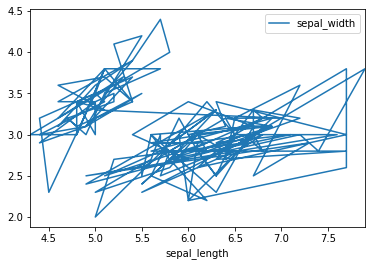

In [30]:
iris.plot(x='sepal_length', y = 'sepal_width')
plt.show() # line plot doesn't make a lot of sense

#### Scatter plot

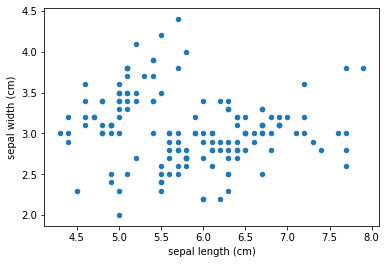

In [33]:
iris.plot(x='sepal_length', y = 'sepal_width', kind = 'scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#### Box plot

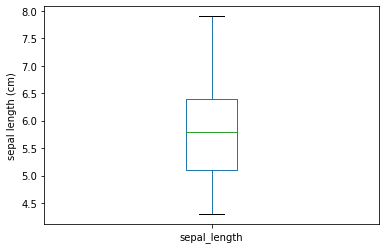

In [35]:
iris.plot(y ='sepal_length', kind = 'box')
plt.ylabel('sepal length (cm)')
plt.show()

#### Histogram

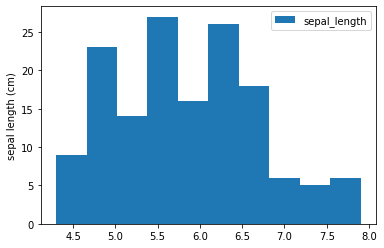

In [36]:
iris.plot(y ='sepal_length', kind = 'hist')
plt.ylabel('sepal length (cm)')
plt.show()

#### Histogram options
* bins (integer): number of intervals or bins
* range (tuple): extema of bing (minimum, maximum)
* normed (boolean): whether to normalize to one
* cumulative (boolean): computer Cumulative Distribution Function (CDF)
* ... more matplotlib customizations

#### Customizing histogram

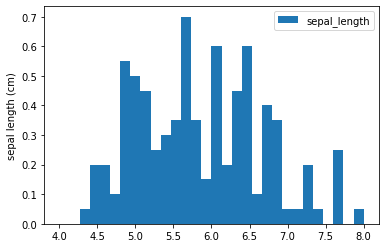

In [38]:
iris.plot(y ='sepal_length', kind = 'hist', bins = 30, range=(4,8), density = True)
plt.ylabel('sepal length (cm)')
plt.show()

#### Cumulative distribution

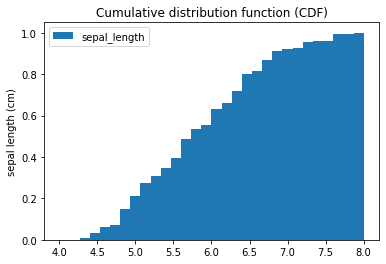

In [39]:
iris.plot(y ='sepal_length', kind = 'hist', bins = 30, range=(4,8), density = True, cumulative = True)
plt.ylabel('sepal length (cm)')
plt.title('Cumulative distribution function (CDF)')
plt.show()

#### Word of warning
* Three different DataFrame plot idioms
    * `iris.plot(kind='hist')`
    * `iris.plt.hist()`
    * `iris.hist()`
* Syntax/results differ!
* Pandas API still evolving: check documentation!

### Statistical exploratory data analysis

#### Summarizing with describe()

In [41]:
iris.describe()  # summary statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Describe
* count: number of entries
* mean: average of entreis
* std: standard deviation
* min: minimum entry
* 25%: first quartile
* 50%: median or second quartile
* 75%: third quartile
* max: maximum entry

#### Counts

In [43]:
iris['sepal_length'].count() # Applied to Series

150

In [44]:
iris[['petal_length', 'petal_width']].count() # Applied to DataFrame

petal_length    150
petal_width     150
dtype: int64

#### Averages

In [45]:
iris['sepal_length'].mean() # Applied to Series

5.843333333333334

In [46]:
iris.mean() # Applied to entire DataFrame

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

#### Standard deviations

In [47]:
iris.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

#### Medians

In [48]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

#### Medians & 0.5 quantiles

In [49]:
q = 0.5
iris.quantile(q)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

#### Inter-quartile range (IQR)

In [50]:
q = [0.25, 0.75]
iris.quantile(q)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


#### Ranges

In [51]:
iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [52]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

#### Box plots

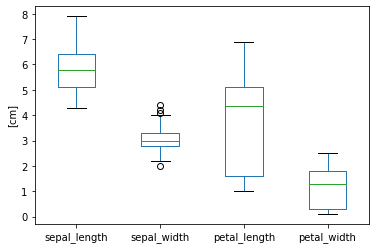

In [53]:
iris.plot(kind = 'box')
plt.ylabel('[cm]')
plt.show()

In [54]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Separating populations

#### Describe species column
* count: # non-null entries
* unique: # distinct values
* top: most frequent category (but 3-way tie in this case)
* freq: # occurrences of top

In [55]:
iris['species'].describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

#### Unique & factors

In [56]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Filtering by species

In [58]:
indices = iris['species'] == 'setosa'
setosa = iris.loc[indices,:] # extract new DataFrame

indices = iris['species'] == 'versicolor'
versicolor = iris.loc[indices,:] # extract new DataFrame

indices = iris['species'] == 'virginica'
virginica = iris.loc[indices,:] # extract new DataFrame

#### Visual EDA: all data

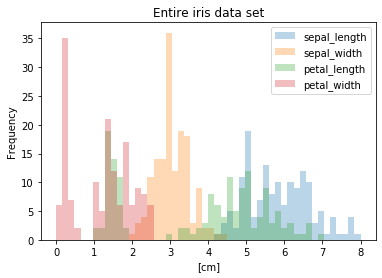

In [59]:
iris.plot(kind = 'hist', bins = 50, range=(0,8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('[cm]')
plt.show()

#### Visual EDA: individual factors

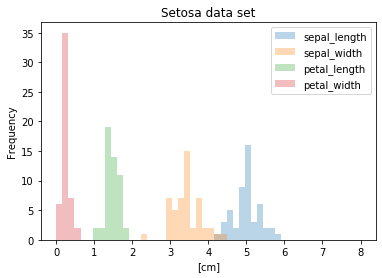

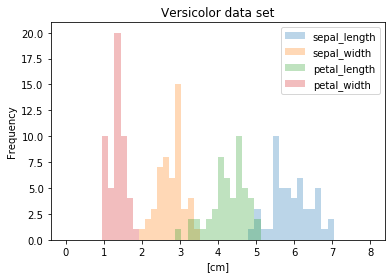

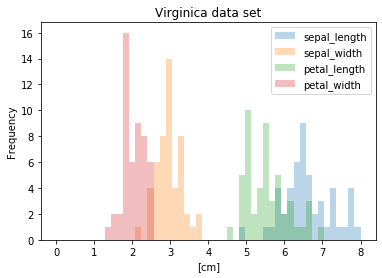

In [60]:
setosa.plot(kind = 'hist', bins = 50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('[cm]')

versicolor.plot(kind = 'hist', bins = 50, range=(0,8), alpha=0.3)
plt.title('Versicolor data set')
plt.xlabel('[cm]')

virginica.plot(kind = 'hist', bins = 50, range=(0,8), alpha=0.3)
plt.title('Virginica data set')
plt.xlabel('[cm]')

plt.show()

#### Statistical EDA: describe()

In [61]:
describe_all = iris.describe()
describe_all

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

#### Computing errors

In [64]:
import numpy as np

error_setosa = 100 * np.abs(describe_setosa - describe_all)
error_setosa = error_setosa/describe_setosa

error_versicolor = 100 * np.abs(describe_versicolor - describe_all)
error_versicolor = error_versicolor/describe_versicolor

error_virginica = 100 * np.abs(describe_virginica - describe_all)
error_virginica = error_virginica/describe_virginica

In [65]:
error_setosa

,sepal_length,sepal_width,petal_length,petal_width
count,200.000000,200.000000,200.000000,200.000000
mean,16.726595,10.649503,156.739526,391.256831
std,134.919250,13.796994,916.891608,611.840574
min,0.000000,13.043478,0.000000,0.000000
25%,6.250000,10.400000,14.285714,50.000000
50%,16.000000,11.764706,190.000000,550.000000
75%,23.076923,10.204082,223.809524,500.000000
max,36.206897,0.000000,263.157895,316.666667
